<Figure size 720x720 with 0 Axes>

轮廓系数(silhouette)=0.505852
ARI= 0.6290641602877824


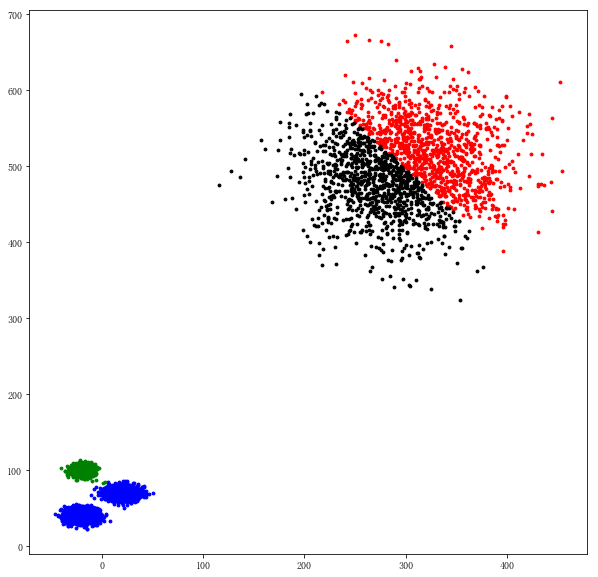

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
%matplotlib inline
sampleNo = 2000
x=np.random.normal(loc=[-20,-20,20,300],scale=[5,8,8,50],size=(sampleNo,4))
y=np.random.normal(loc=[100,40,70,500],scale=[4,5,5,50],size=(sampleNo,4))
color=['blue','red','black','green']
fig=plt.figure(figsize=(10,10))
for i in range(0,4):
    pass
    #plt.scatter(x[:,i],y[:,i],color='red',marker='.')
plt.show()
data=pd.DataFrame({'x':x[:,0],'y':y[:,0],'label':'blue'})
for i in range(1,4):
    data=data.append(pd.DataFrame({'x':x[:,i],'y':y[:,i],'label':color[i]}),ignore_index=True)
from IPython.display import display
#display(data)

from sklearn.cluster import KMeans

model=KMeans(n_clusters=4,init='k-means++',random_state=0)
model.fit(data.drop('label',axis=1))

clusters=list(set(model.labels_))
data0=data.copy()
data0['cluster']=model.labels_
fig2=plt.figure(figsize=(10,10))
for i in clusters:
    tempdata=data0[data0['cluster']==i]
    plt.scatter(tempdata['x'],tempdata['y'],c=color[i],s=8)
from sklearn.metrics import silhouette_score
print('轮廓系数(silhouette)=%f'%silhouette_score(data.drop('label',axis=1),model.labels_, metric='euclidean'))
from sklearn.metrics import adjusted_rand_score
print('ARI=',adjusted_rand_score(data['label'],model.labels_))